<h1> Práctico: Ejercicio Tablas </h1>
<h2><FONT COLOR="#FF0000"> Integrantes: Melania Omonte, Máximo Zoppini y Flavio Olivier</FONT></h2>
<h3> Análisis y Curación de datos - 2019 </h3>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/"
else:
  BASE_DIR = ".."

In [3]:
BASE_DIR = "https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/"

tabla_1 = pd.read_csv(BASE_DIR + "input/wtageinf.csv")
tabla_1.head(10)

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878
5,1,4.5,0.219867,7.041836,0.121040,5.575169,5.744752,6.013716,6.484969,7.041836,7.635323,8.202193,8.556813,8.793444
6,1,5.5,0.077506,7.630425,0.118271,6.096775,6.272175,6.551379,7.043627,7.630425,8.262033,8.871384,9.255615,9.513307
7,1,6.5,-0.021908,8.162951,0.116154,6.564430,6.745993,7.035656,7.548346,8.162951,8.828786,9.475466,9.885436,10.161350
8,1,7.5,-0.089441,8.644832,0.114510,6.984123,7.171952,7.472021,8.004399,8.644832,9.341490,10.021014,10.453314,10.744924
9,1,8.5,-0.133409,9.081120,0.113217,7.361236,7.555287,7.865533,8.416719,9.081120,9.805593,10.514064,10.965736,11.270838


In [4]:
tabla_1.shape

(76, 14)

In [5]:
tabla_1.dtypes

Sex         int64
Agemos    float64
L         float64
M         float64
S         float64
P3        float64
P5        float64
P10       float64
P25       float64
P50       float64
P75       float64
P90       float64
P95       float64
P97       float64
dtype: object

In [6]:
tabla_1.columns

Index(['Sex', 'Agemos', 'L', 'M', 'S', 'P3', 'P5', 'P10', 'P25', 'P50', 'P75',
       'P90', 'P95', 'P97'],
      dtype='object')

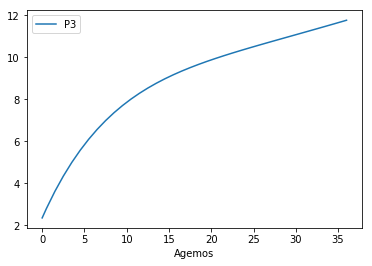

In [7]:
filtrado= tabla_1[tabla_1.Sex==1]
filtrado.plot(x='Agemos', y='P3');

# Ejercicio 1: Tablas de Crecimiento
### Graficar las curvas correspondientes a cada percentil para niños y niñas
a. En la columna Sex, 1 representa a niños y 2 a niñas.  
b. Las curvas de los percentiles correspondientes a un mismo sexo deben ir en un mismo gráfico.  
c. Un gráfico para cada sexo.

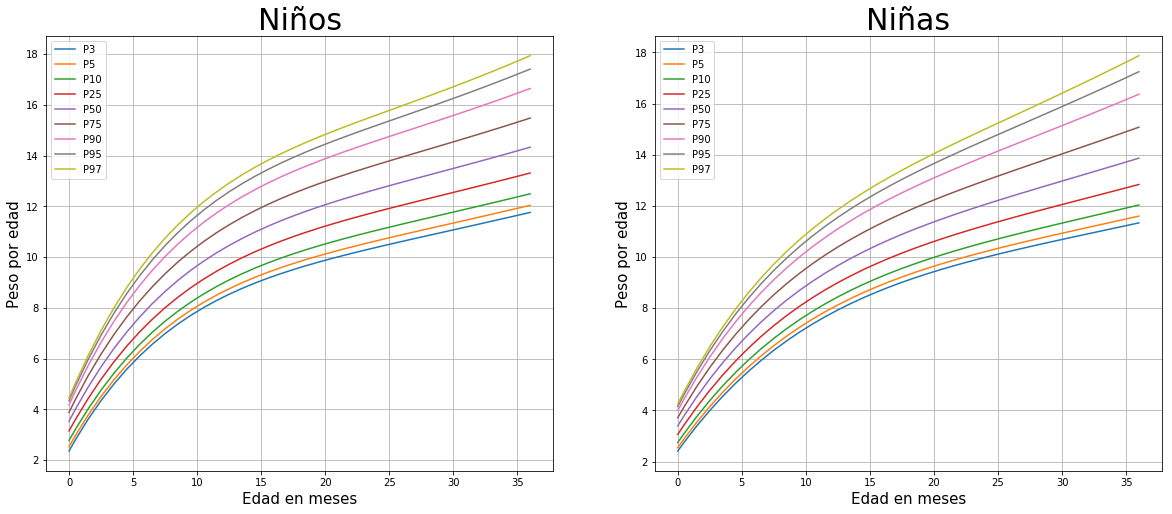

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

tabla_1.loc[tabla_1['Sex'] == 1].plot(x = 'Agemos', y = list(tabla_1.columns[-9:]), ax = ax[0])
tabla_1.loc[tabla_1['Sex'] == 2].plot(x = 'Agemos', y = list(tabla_1.columns[-9:]), ax = ax[1])

ax[0].set_title('Niños', fontsize = 30)
ax[0].set_xlabel('Edad en meses', fontsize = 15)
ax[0].set_ylabel('Peso por edad', fontsize = 15)
ax[0].grid()

ax[1].set_title('Niñas', fontsize = 30)
ax[1].set_xlabel('Edad en meses', fontsize = 15)
ax[1].set_ylabel('Peso por edad', fontsize = 15)
ax[1].grid()

plt.show()

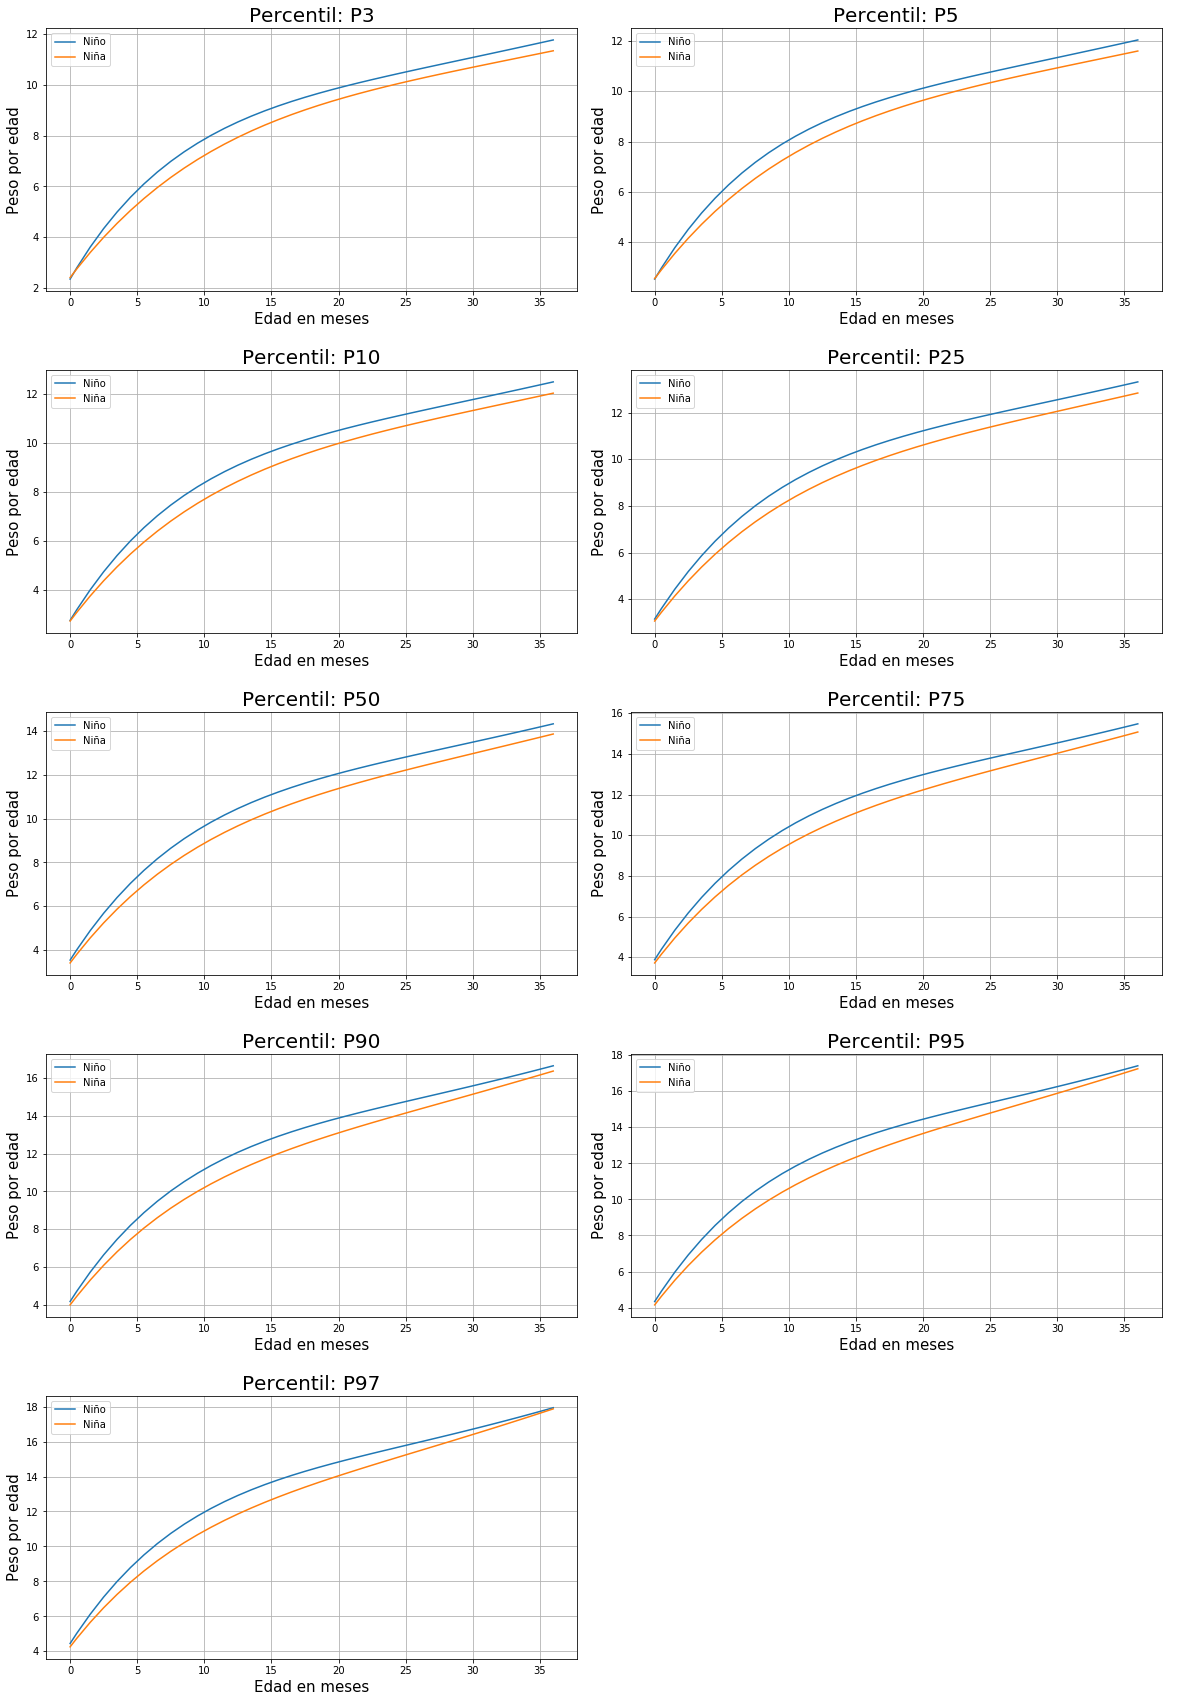

In [9]:
#SOLO POR CURIOSIDAD: comparamos/observamos Percentiles por "sexo".

fig, ax = plt.subplots(5, 2, figsize=(20, 30))
ax = ax.flatten()
plt.subplots_adjust(hspace = 0.3, wspace = 0.1)

for i, vperc in enumerate(list(tabla_1.columns[-9:])):
    pd.pivot_table(tabla_1, values = vperc, index = 'Agemos', columns = 'Sex').plot(ax = ax[i])
    
    ax[i].set_title('Percentil: '+vperc, fontsize = 20)
    ax[i].set_xlabel('Edad en meses', fontsize = 15)
    ax[i].set_ylabel('Peso por edad', fontsize = 15)
    ax[i].grid()
    ax[i].legend(['Niño', 'Niña'])

ax[9].axis('off')
plt.show()

# Ejercicio 2: Pasos Fronterizos
1. Descargar dataset en JSON: Pasos Fronterizos.  
2. Graficar un histograma agrupando por valor del atributo “province”.

In [10]:
#leemos json.

pd.reset_option("display.precision")

json_data = pd.read_json('https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/pasos.json')

In [11]:
json_data.sample(5)

,location,name,province
184,"[-27.3692482, -55.5817447]",PUERTO SANTA ANA,Misiones
119,"[-36.5938265, -64.2811118]",AERO SANTA ROSA,Córdoba
168,"[-27.5884602, -56.6900782]",PUERTO ITUZAINGO,Corrientes
174,"[-26.9284561, -58.5121455]",PUERTO BERMEJO,Chaco
32,"[-45.7894354, -67.4696871]",AEROPUERTO INTERNACIONAL GENERAL ENRIQUE MOSCONI,Chubut


In [12]:
json_data.dtypes

location    object
name        object
province    object
dtype: object

In [13]:
json_data.shape

(252, 3)

In [14]:
#extraemos "lat" y "lon" desde "location" generando dos campos nuevos.

pd.set_option("display.precision", 7)

json_data1 = json_data.copy()

#json_data1['lat'] = json_data1['location'].apply(lambda vlist: vlist[0])
#json_data1['lon'] = json_data1['location'].apply(lambda vlist: vlist[1])

json_data1[['lat', 'lon']] = json_data1['location'].apply(lambda x: pd.Series([x[0], x[1]]))

In [15]:
json_data1.head()

,location,name,province,lat,lon
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego,-54.8325430,-68.3712885
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego,-54.8249379,-68.3258626
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego,-54.8096728,-68.3114748
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego,-54.8019121,-68.3029511
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz,-51.6896359,-72.2993574


In [16]:
#acomodamos columnas, eliminamos "location".

json_data1.drop('location', axis=1, inplace = True)

json_data1.head()

,name,province,lat,lon
0,SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego,-54.8325430,-68.3712885
1,AERO PUBLICO DE USHUAIA,Tierra del Fuego,-54.8249379,-68.3258626
2,PUERTO USHUAIA (PREFECTURA),Tierra del Fuego,-54.8096728,-68.3114748
3,PUERTO USHUAIA,Tierra del Fuego,-54.8019121,-68.3029511
4,PASO LAURITA CASAS VIEJAS,Santa Cruz,-51.6896359,-72.2993574


In [17]:
json_data1.shape

(252, 4)

In [18]:
#listamos registros duplicados "idénticos".

json_data1[json_data1.duplicated(keep = False)].sort_values(by ='lat')

,name,province,lat,lon
22,ING. PALLAVICINI - IBAÑEZ,Santa Cruz,-46.2752267,-71.7270022
23,ING. PALLAVICINI - IBAÑEZ,Santa Cruz,-46.2752267,-71.7270022
30,AERO COMODORO RIVADAVIA,Chubut,-45.7894354,-67.4696871
31,AERO COMODORO RIVADAVIA,Chubut,-45.7894354,-67.4696871
53,AERO NEUQUEN,Neuquen,-38.9521333,-68.1426730
54,AERO NEUQUEN,Neuquen,-38.9521333,-68.1426730
63,AERO MAR DEL PLATA,Buenos Aires,-37.9341161,-57.5745361
227,AERO MAR DEL PLATA,Buenos Aires,-37.9341161,-57.5745361
88,AERO JORGE NEWBERY,Buenos Aires,-34.5580305,-58.4191975
89,AERO JORGE NEWBERY,Buenos Aires,-34.5580305,-58.4191975


In [19]:
#eliminamos registros duplicados "idénticos".

json_data2 = json_data1.drop_duplicates()

json_data2.shape

(240, 4)

In [20]:
#listamos registros con idéntica "lat" y "lon".

json_data2[json_data2.duplicated(keep = False, subset = ['lon', 'lat'])].sort_values(by ='lat')

,name,province,lat,lon
14,AERO RIO GALLEGOS,Santa Cruz,-51.6117879,-69.3085038
15,AERO RIO GALLEGOS,AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO...,-51.6117879,-69.3085038
30,AERO COMODORO RIVADAVIA,Chubut,-45.7894354,-67.4696871
32,AEROPUERTO INTERNACIONAL GENERAL ENRIQUE MOSCONI,Chubut,-45.7894354,-67.4696871
38,AEROPUERTO INTERNACIONAL TENIENTE LUIS CANDELA...,Rio Negro,-41.1467101,-71.1642129
224,AERO BARILOCHE,Rio Negro,-41.1467101,-71.1642129
239,HUA HUM (FLUVIAL),Neuquen,-40.1133859,-71.6806031
45,PASO HUA - HUM,Neuquen,-40.1133859,-71.6806031
72,AERO EZEIZA,Buenos Aires,-34.8150044,-58.5370171
73,AERO EZEIZA - FBO,Buenos Aires,-34.8150044,-58.5370171


In [21]:
json_data2[json_data2.duplicated(subset = ['lon', 'lat'])].sort_values(by ='lat').shape

(22, 4)

In [22]:
#eliminamos registros duplicados con idéntica "lat" y "lon".

json_data3 = json_data2.drop_duplicates(keep = 'first', subset=['lat', 'lon'])
json_data3.shape

(218, 4)

In [23]:
#observamos "province" duplicados y mal escritos, los corregimos.

print(sorted(json_data3.province.unique()))

json_data4 = json_data3.copy()

json_data4['province'] = json_data4['province'].apply(lambda x: x.title())
json_data4['province'].replace('Cordoba', 'Córdoba', inplace = True)

print()
print(sorted(json_data4.province.unique()))

['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Cordoba', 'Corrientes', 'Córdoba', 'Entre Rios', 'Formosa', 'Jujuy', 'La Rioja', 'Mendoza', 'Misiones', 'NEUQUEN', 'Neuquen', 'Rio Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucuman']

['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Corrientes', 'Córdoba', 'Entre Rios', 'Formosa', 'Jujuy', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquen', 'Rio Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucuman']


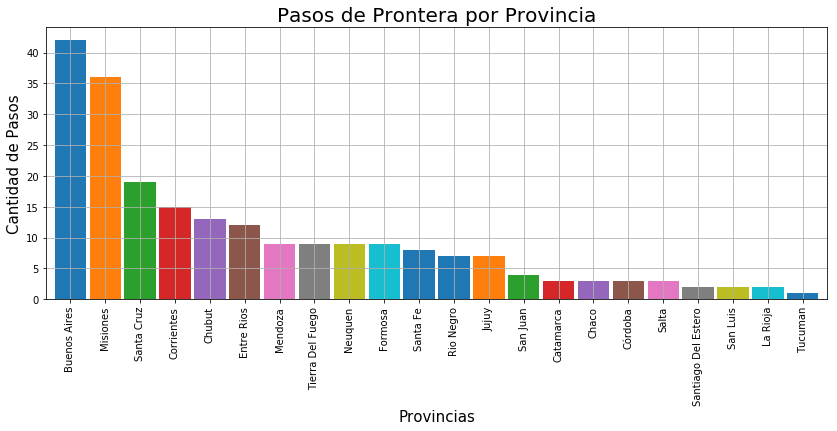

In [24]:
#dibujamos gráfico de barras por "province".

json_data4['province'].value_counts().plot(kind='bar', figsize = (14, 5), grid = True, width = .9)

plt.title('Pasos de Prontera por Provincia', fontsize = 20)
plt.xlabel('Provincias', fontsize = 15)
plt.ylabel('Cantidad de Pasos', fontsize = 15)

plt.show()

# Ejercicios Opcionales
### Leer ubicaciones de pasos fronterizos y dibujar en un mapa.

In [25]:
from gmplot import gmplot

In [26]:
#dibujamos el mapa.

min_lat = min(json_data4['lat'])
max_lat = max(json_data4['lat'])
min_lon = min(json_data4['lon'])
max_lon = max(json_data4['lon'])

In [27]:
mymap = gmplot.GoogleMapPlotter(min_lat + (max_lat - min_lat) / 2, min_lon + (max_lon - min_lon) / 2, 4)

mymap.coloricon = 'http://www.googlemapsmarkers.com/v1/%s/'

mymap.scatter(json_data4['lat'], json_data4['lon'], 'red', size = 20, marker= True)

for i, vindex in enumerate(json_data4.index):
    mymap.marker(json_data4['lat'][vindex], json_data4['lon'][vindex], title=json_data4['name'][vindex].title() + ' - ' + json_data4['province'][vindex].upper())

In [28]:
mymap.draw('pasos_fronterizos_plot.html')

In [29]:
import os
os.system('pasos_fronterizos_plot.html')

0